# Лабораторная забота №3

# Проверка статистических гипотез о виде и параметрах распределения случайных величин

# Вариант 8

# Часть 1

In [1]:
import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, chisquare, normaltest
from scipy.stats import norm

In [2]:
alfa = 0.035
M = 4500
a = 0
sigma2 = 1.21
sigma = np.sqrt(sigma2)
n = 45

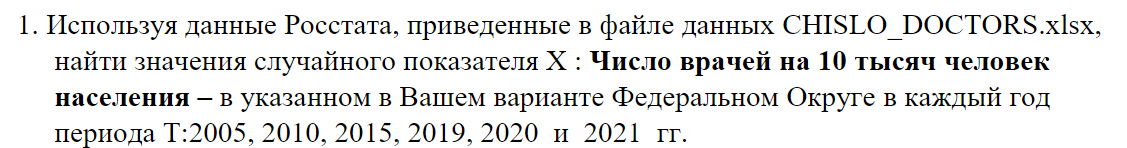

In [3]:
print(os.getcwd())
path = "D:\\sda"
os.chdir(path)
os.getcwd()

d:\sda\stat


'D:\\sda'

In [4]:
doc=pd.read_excel("stat\\CHISLO_DOCTORS.xlsx", sheet_name='part1')

In [5]:
doc.head()

,ЦФО,2005,2010,2015,2019,2020,2021
0,Белгородская область,39.6,40.4,41.3,40.5,40.4,41.9
1,Брянская область,36.4,36.2,38.0,40.2,40.5,39.1
2,Владимирская область,33.7,33.1,33.8,35.1,36.5,37.5
3,Воронежская область,53.1,52.6,51.7,52.9,52.3,53.6
4,Ивановская область,51.0,51.9,43.8,44.1,45.4,44.5


In [6]:
X_cfo = doc["ЦФО"]

In [7]:
def get_doctor_data(federal_district: str): 
    df = pd.read_excel("stat\\CHISLO_DOCTORS.xlsx", sheet_name='part1'  ) 
 
    years = [2005, 2010, 2015, 2019, 2020, 2021] 
    data = df[years].iloc[:]  
    return data 

federal_district = "ЦФО" 

data = get_doctor_data(federal_district)

if data is not None:
    print(f"Данные о числе врачей на 10 тысяч человек в {federal_district}:")
    for year, value in data.items():
        print(f"{value}")


Данные о числе врачей на 10 тысяч человек в ЦФО:
0     39.6
1     36.4
2     33.7
3     53.1
4     51.0
5     38.8
6     36.7
7     50.0
8     39.8
9     34.7
10    37.6
11    53.3
12    59.7
13    33.7
14    51.6
15    33.9
16    58.1
17    72.7
Name: 2005, dtype: float64
0     40.4
1     36.2
2     33.1
3     52.6
4     51.9
5     39.6
6     34.6
7     58.0
8     40.4
9     35.8
10    39.9
11    56.8
12    59.7
13    34.0
14    53.1
15    33.1
16    62.9
17    77.7
Name: 2010, dtype: float64
0     41.3
1     38.0
2     33.8
3     51.7
4     43.8
5     38.5
6     36.0
7     49.0
8     42.5
9     38.0
10    44.5
11    47.9
12    50.1
13    35.8
14    43.4
15    35.2
16    52.7
17    55.7
Name: 2015, dtype: float64
0     40.5
1     40.2
2     35.1
3     52.9
4     44.1
5     42.6
6     38.1
7     51.3
8     42.3
9     42.6
10    44.8
11    52.6
12    51.6
13    40.3
14    45.4
15    38.5
16    50.3
17    61.2
Name: 2019, dtype: float64
0     40.4
1     40.5
2     36.5
3     52.3
4     4

In [8]:
sec = pd.read_excel("stat\\CHISLO_DOCTORS.xlsx", sheet_name='part1') 

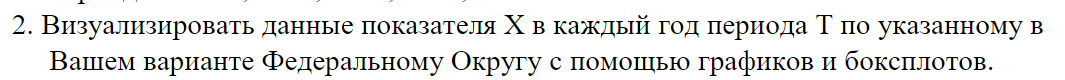

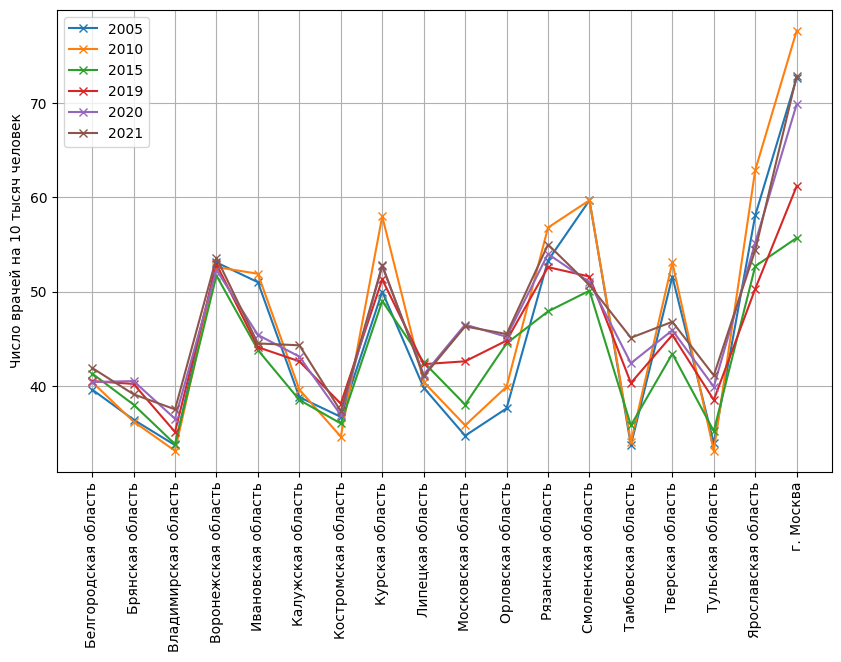

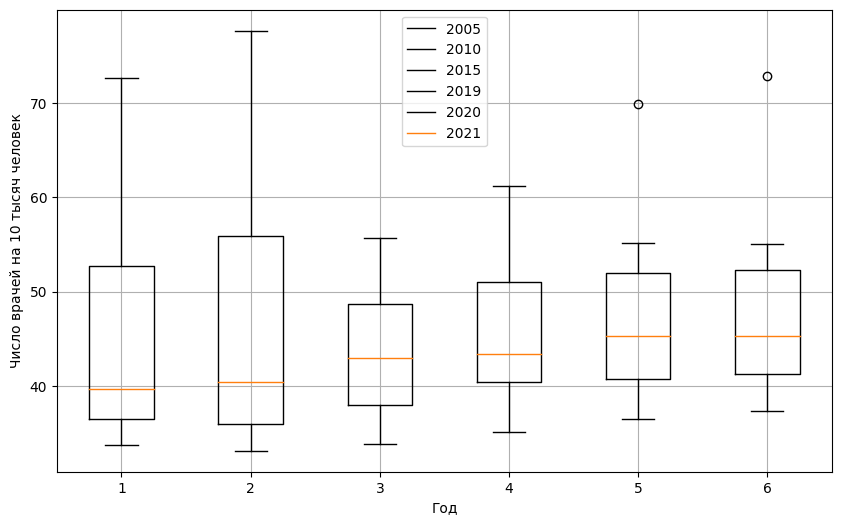

In [9]:
plt.figure(figsize=(10, 6))  
plt.plot(sec['ЦФО'], data, marker='x') 
plt.ylabel('Число врачей на 10 тысяч человек') 
plt.xticks(rotation=90)
plt.legend(data.columns)  
plt.grid(True)
plt.show()
 
plt.figure(figsize=(10,6))
plt.boxplot(data)
plt.xlabel('Год')
plt.ylabel('Число врачей на 10 тысяч человек') 
plt.legend(data.columns) 
plt.grid(True)
plt.show()

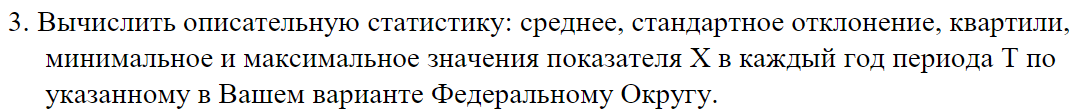

In [10]:
years = [2005, 2010, 2015, 2019, 2020, 2021]
descriptive_stats = {}
data_mean = {}
for year in years: 
    year_data = data[year]  
    data_mean[year] = np.mean(data[year])
    stats = {
        'Среднее': np.mean(year_data),
        'Стандартное отклонение': np.std(year_data), 
        'Квартиль 1': np.percentile(year_data, 25),
        'Медиана (Квартиль 2)': np.percentile(year_data, 50),
        'Квартиль 3': np.percentile(year_data, 75),
        'Минимум': np.min(year_data),
        'Максимум': np.max(year_data)
    }
    descriptive_stats[year] = stats

print("Описательная статистика показателя X:")
for year, stats in descriptive_stats.items():
    print(f"\nГод: {year}")
    for stat, value in stats.items():
        print(f"{stat}: {value:.3f}") 

Описательная статистика показателя X:

Год: 2005
Среднее: 45.244
Стандартное отклонение: 10.980
Квартиль 1: 36.475
Медиана (Квартиль 2): 39.700
Квартиль 3: 52.725
Минимум: 33.700
Максимум: 72.700

Год: 2010
Среднее: 46.656
Стандартное отклонение: 12.489
Квартиль 1: 35.900
Медиана (Квартиль 2): 40.400
Квартиль 3: 55.875
Минимум: 33.100
Максимум: 77.700

Год: 2015
Среднее: 43.217
Стандартное отклонение: 6.512
Квартиль 1: 38.000
Медиана (Квартиль 2): 42.950
Квартиль 3: 48.725
Минимум: 33.800
Максимум: 55.700

Год: 2019
Среднее: 45.244
Стандартное отклонение: 6.523
Квартиль 1: 40.350
Медиана (Квартиль 2): 43.350
Квартиль 3: 51.050
Минимум: 35.100
Максимум: 61.200

Год: 2020
Среднее: 46.611
Стандартное отклонение: 7.959
Квартиль 1: 40.675
Медиана (Квартиль 2): 45.300
Квартиль 3: 51.975
Минимум: 36.500
Максимум: 69.900

Год: 2021
Среднее: 47.211
Стандартное отклонение: 8.310
Квартиль 1: 41.300
Медиана (Квартиль 2): 45.300
Квартиль 3: 52.275
Минимум: 37.300
Максимум: 72.900


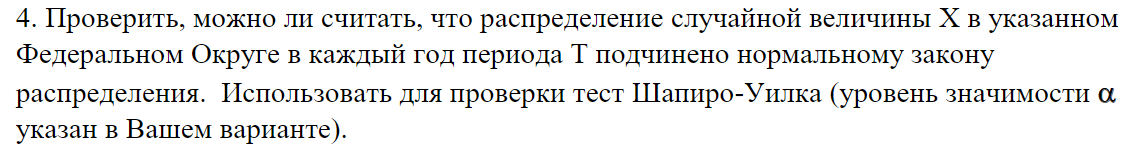

In [11]:
alpha = 0.035

years = [2005, 2010, 2015, 2019, 2020, 2021]
normal_years = []
for year in years:
    year_data = data[year]
    year_data_array = np.array(year_data)
    statistic, p_value = shapiro(year_data_array)
    print(f"Год {year}:")
    print(f"  Статистика Шапиро-Уилка: {statistic:.3f}")
    print(f"  p-значение: {p_value:.3f}")
    if p_value > alpha:
        print(f"  Распределение считается нормальным (p-значение > {alpha})")
        normal_years.append(year)
    else:
        print(f"  Распределение НЕ считается нормальным (p-значение <= {alpha})") 
print("\nГоды, для которых распределение считается нормальным:", normal_years) 



Год 2005:
  Статистика Шапиро-Уилка: 0.875
  p-значение: 0.022
  Распределение НЕ считается нормальным (p-значение <= 0.035)
Год 2010:
  Статистика Шапиро-Уилка: 0.884
  p-значение: 0.031
  Распределение НЕ считается нормальным (p-значение <= 0.035)
Год 2015:
  Статистика Шапиро-Уилка: 0.946
  p-значение: 0.372
  Распределение считается нормальным (p-значение > 0.035)
Год 2019:
  Статистика Шапиро-Уилка: 0.937
  p-значение: 0.255
  Распределение считается нормальным (p-значение > 0.035)
Год 2020:
  Статистика Шапиро-Уилка: 0.892
  p-значение: 0.042
  Распределение считается нормальным (p-значение > 0.035)
Год 2021:
  Статистика Шапиро-Уилка: 0.863
  p-значение: 0.014
  Распределение НЕ считается нормальным (p-значение <= 0.035)

Годы, для которых распределение считается нормальным: [2015, 2019, 2020]


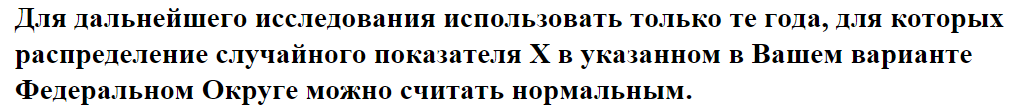
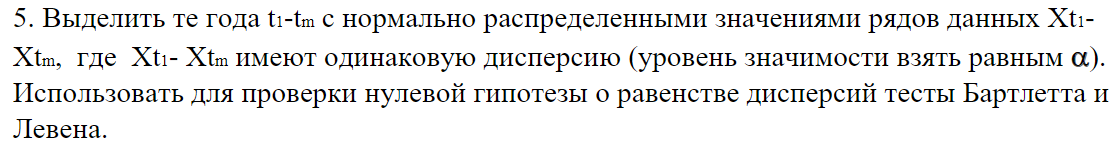

In [12]:
from scipy import stats as sts
bartlett = sts.bartlett(data[2015], data[2019], data[2020])
print(bartlett)
if bartlett[1] > alpha:
    print('Тест Бартлетта показал, что во всех выборках одинаковые дисперсии\n')
else:
    print('Хотя бы одна выборка имеет отличающуюся дисперсию')

levene = sts.levene(data[2015], data[2019], data[2020])
print(levene)
if bartlett[1] > alpha:
    print('Тест Левена показал, что во всех выборках одинаковые дисперсии\n')
else:
    print('Хотя бы одна выборка имеет отличающуюся дисперсию')

BartlettResult(statistic=0.9163979954991529, pvalue=0.6324216132067401)
Тест Бартлетта показал, что во всех выборках одинаковые дисперсии

LeveneResult(statistic=0.10693143109739761, pvalue=0.8987882126090896)
Тест Левена показал, что во всех выборках одинаковые дисперсии



In [13]:
bartlett = sts.bartlett(data[2015], data[2019])
print(bartlett)
if bartlett[1] > alpha:
    print('Тест Бартлетта показал, что во всех выборках одинаковые дисперсии\n')
else:
    print('Хотя бы одна выборка имеет отличающуюся дисперсию')

bartlett = sts.bartlett(data[2015], data[2020])
print(bartlett)
if bartlett[1] > alpha:
    print('Тест Бартлетта показал, что во всех выборках одинаковые дисперсии\n')
else:
    print('Хотя бы одна выборка имеет отличающуюся дисперсию')

bartlett = sts.bartlett(data[2019], data[2020])
print(bartlett)
if bartlett[1] > alpha:
    print('Тест Бартлетта показал, что во всех выборках одинаковые дисперсии\n')
else:
    print('Хотя бы одна выборка имеет отличающуюся дисперсию')

BartlettResult(statistic=4.553280084077675e-05, pvalue=0.9946160756546126)
Тест Бартлетта показал, что во всех выборках одинаковые дисперсии

BartlettResult(statistic=0.660199635291068, pvalue=0.41648947336553777)
Тест Бартлетта показал, что во всех выборках одинаковые дисперсии

BartlettResult(statistic=0.6493865422905012, pvalue=0.42033209208199385)
Тест Бартлетта показал, что во всех выборках одинаковые дисперсии



In [14]:
levene = sts.levene(data[2015], data[2019])
print(levene)
if bartlett[1] > alpha:
    print('Тест Левена показал, что во всех выборках одинаковые дисперсии\n')
else:
    print('Хотя бы одна выборка имеет отличающуюся дисперсию')

levene = sts.levene(data[2015], data[2020])
print(levene)
if bartlett[1] > alpha:
    print('Тест Левена показал, что во всех выборках одинаковые дисперсии\n')
else:
    print('Хотя бы одна выборка имеет отличающуюся дисперсию')

levene = sts.levene(data[2019], data[2020])
print(levene)
if bartlett[1] > alpha:
    print('Тест Левена показал, что во всех выборках одинаковые дисперсии\n')
else:
    print('Хотя бы одна выборка имеет отличающуюся дисперсию')

LeveneResult(statistic=0.055577301382062724, pvalue=0.8150422459657608)
Тест Левена показал, что во всех выборках одинаковые дисперсии

LeveneResult(statistic=0.0634811401819311, pvalue=0.8025929519693825)
Тест Левена показал, что во всех выборках одинаковые дисперсии

LeveneResult(statistic=0.17640445951243885, pvalue=0.6771240145471005)
Тест Левена показал, что во всех выборках одинаковые дисперсии



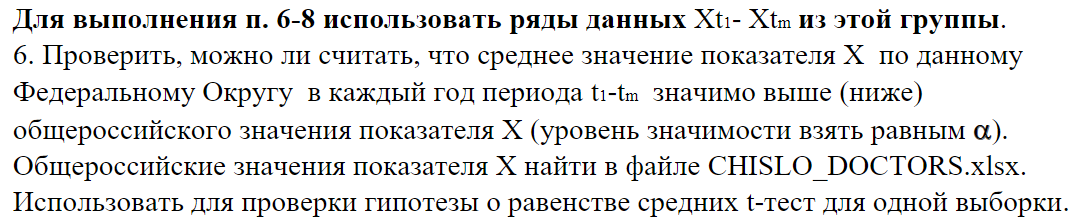

In [15]:
data_rus = {2005: 48.6, 2010: 50.1, 2015: 45.9, 2019: 48.7, 2020: 50.4, 2021: 51}
for y in normal_years:
    res = []
    if data_mean[y] < data_rus[y]:
        res = sts.ttest_1samp(data[y], popmean=data_rus[y], alternative='less')
        print(f'{y} год | {y} - {data_mean[y]} | Общероссийские - {data_rus[y]} | H1(less): \n', res)
        if res[1] > alpha:
            print(f'Данные незначительно отличаются от общероссийских\n')
        else:
            print(f'Данные меньше общероссийских\n')
    else:
        res = sts.ttest_1samp(data[y], popmean=data_rus[y], alternative='greater')
        print(f'{y} год | {y} - {data_mean[y]} | Общероссийские - {data_rus[y]} | H1(greater): \n', res)
        if res[1] > alpha:
            print(f'Данные незначительно отличаются от общероссийских\n')
        else:
            print(f'Данные меньше общероссийских')
    

2015 год | 2015 - 43.21666666666667 | Общероссийские - 45.9 | H1(less): 
 TtestResult(statistic=-1.6988609698599737, pvalue=0.05378518805264744, df=17)
Данные незначительно отличаются от общероссийских

2019 год | 2019 - 45.24444444444445 | Общероссийские - 48.7 | H1(less): 
 TtestResult(statistic=-2.184137410256139, pvalue=0.02162594873120219, df=17)
Данные меньше общероссийских

2020 год | 2020 - 46.611111111111114 | Общероссийские - 50.4 | H1(less): 
 TtestResult(statistic=-1.9627774561024032, pvalue=0.03312497133021606, df=17)
Данные меньше общероссийских



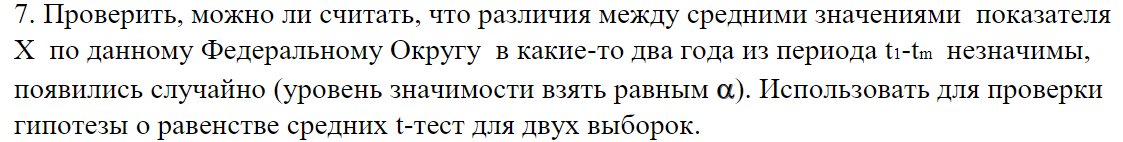

In [16]:
for i in range(3):
    yi = normal_years[i]
    for j in range(i + 1, 3):
        yj = normal_years[j]
        if data_mean[yi] < data_mean[yj]:
            res = sts.ttest_ind(data[yi], data[yj], alternative='less')
        else:
            res = sts.ttest_ind(data[yi], data[yj], alternative='greater')
        print(f'({yi} - {yj})\n', res)
        if res[1] > alfa:
            print(f'Данные {yi} незначимо отличаются от {yj}\n')
        else:
            print(f'Данные значимо отличаются')


(2015 - 2019)
 Ttest_indResult(statistic=-0.9070426485131797, pvalue=0.18538412003969384)
Данные 2015 незначимо отличаются от 2019

(2015 - 2020)
 Ttest_indResult(statistic=-1.3609256805569738, pvalue=0.09124512187828875)
Данные 2015 незначимо отличаются от 2020

(2019 - 2020)
 Ttest_indResult(statistic=-0.5475689702717554, pvalue=0.2937823833516262)
Данные 2019 незначимо отличаются от 2020



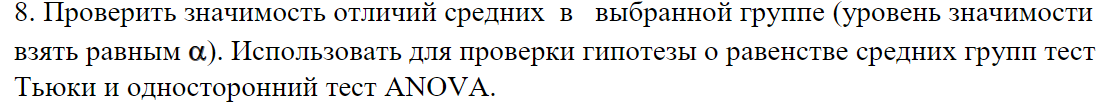

In [17]:
res = sts.f_oneway(data[2015], data[2019], data[2020])
print(res)
if res[1] > alpha:
    print(f'Средние по всем годам одинаковые(незначительно отличаются друг от другы)\n')
else:
    print(f'Есть хотя бы один год, в котором среднее отличается от отсальных\n')

res = sts.tukey_hsd(data[2015], data[2019], data[2020])
print(res)

F_onewayResult(statistic=1.0030662022066084, pvalue=0.3738724857520923)
Средние по всем годам одинаковые(незначительно отличаются друг от другы)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.028     0.680    -7.849     3.794
 (0 - 2)     -3.394     0.345    -9.216     2.427
 (1 - 0)      2.028     0.680    -3.794     7.849
 (1 - 2)     -1.367     0.838    -7.188     4.455
 (2 - 0)      3.394     0.345    -2.427     9.216
 (2 - 1)      1.367     0.838    -4.455     7.188



# Часть 2

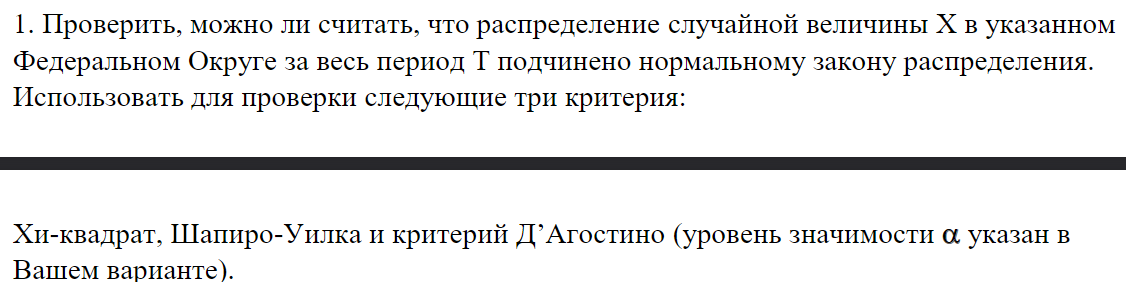

In [28]:
x = data.values
x_all = []
for arr in x:
    x_all += list(arr)
print(len(x_all))

108


In [19]:
res = shapiro(x_all)
print(res)
if res.pvalue > alpha:
    print('Normal')
else:
    print('Not normal')

ShapiroResult(statistic=0.9224239587783813, pvalue=9.323756785306614e-06)
Not normal


In [29]:
mu = np.mean(x_all)
sigma = np.std(x_all)
num_bins = int(np.log2(len(x_all)) + 1)
bins = np.linspace(np.min(x_all), np.max(x_all), num_bins + 1)
observed_frequencies, _ = np.histogram(x_all, bins)
expected_frequencies = len(x_all) * np.diff(norm.cdf(bins, loc=mu, scale=sigma))
expected_frequencies *= observed_frequencies.sum() / expected_frequencies.sum()
chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)
print(p_value)
if p_value > alpha:
    print('Normal')
else:
    print('Not normal')
print(expected_frequencies.sum())

5.014285131704705e-07
Not normal
1.0


In [21]:
res = sts.normaltest(x_all)
print(res)
if res.pvalue > alpha:
    print('Normal')
else:
    print('Not normal')

NormaltestResult(statistic=19.811440398515952, pvalue=4.988849218900146e-05)
Not normal


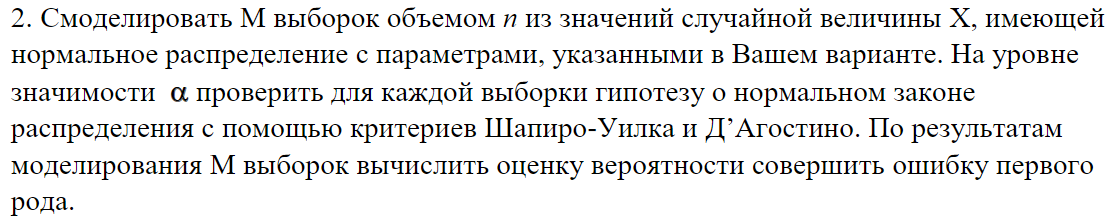

In [ ]:
samples = [np.random.normal(loc=a, scale=sigma, size=n) for _ in range(M)]

norm_sh = 0
norm_norm = 0
norm_twice = 0
for sample in samples:
    stat_sh, p_value_sh = shapiro(sample)
    stat_norm, p_value_norm = normaltest(sample)
    if p_value_sh > alpha:
        norm_sh += (1 / M)
    if p_value_norm > alpha:
        norm_norm += (1 / M) 

print("Shapiro Wilk:", 1 - norm_sh)
print("D'agostino: ", 1 - norm_norm) 

Shapiro Wilk: 0.032500000000090234
D'agostino:  0.04390000000008898


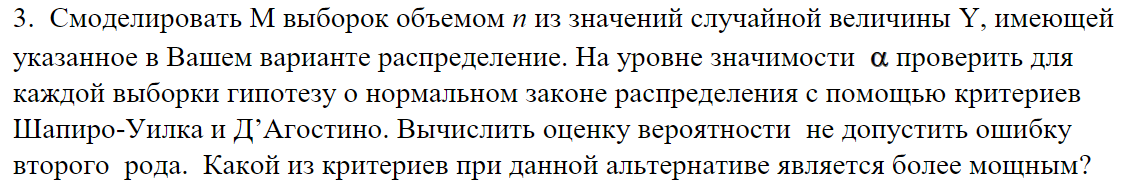

In [23]:
samples = [sts.t.rvs(df=6, size=n) for _ in range(M)]


beta_shapiro = 0
beta_dagostino = 0
for sample in samples:
    stat_sh, p_value_sh = shapiro(sample)
    stat_norm, p_value_norm = normaltest(sample)
    if p_value_sh > alpha:
        beta_shapiro += (1 / M)
    if p_value_norm > alpha:
        beta_dagostino += (1 / M)

power_shapiro = 1 - beta_shapiro
power_dagostino = 1 - beta_dagostino
print(f"Ошибка второго рода (Шапиро-Уилк): {beta_shapiro}, Мощность: {power_shapiro}")
print(f"Ошибка второго рода (Д’Агостино): {beta_dagostino}, Мощность: {power_dagostino}")

if power_shapiro > power_dagostino:
    print("Критерий Шапиро-Уилка более мощный для данной альтернативы.")
else:
    print("Критерий Д’Агостино более мощный для данной альтернативы.")

Ошибка второго рода (Шапиро-Уилк): 0.7680000000000355, Мощность: 0.23199999999996446
Ошибка второго рода (Д’Агостино): 0.718222222222255, Мощность: 0.28177777777774504
Критерий Д’Агостино более мощный для данной альтернативы.
